# Building Lenet-5 Architecture (The First CNN)
### Training it on MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
row,cols = 28,28
X_train = X_train.reshape(X_train.shape[0],row,cols,1)
Y_test = X_test.reshape(X_test.shape[0],row,cols,1)
input_shape = (row,cols,1)

In [4]:
X_train = X_train/255
X_test = X_test/255

y_train = utils.to_categorical(y_train, num_classes=10)
y_test = utils.to_categorical(y_test, num_classes=10)

## LeNet 5 Architecture

In [5]:
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=input_shape))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=120,activation='tanh'))
model.add(Dense(units=84,activation='tanh'))
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'Adam',metrics = ['Accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
y_train.shape

(60000, 10)

In [8]:
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - Accuracy: 0.8304 - loss: 0.5964 - val_Accuracy: 0.9502 - val_loss: 0.1664
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - Accuracy: 0.9569 - loss: 0.1396 - val_Accuracy: 0.9718 - val_loss: 0.0943
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - Accuracy: 0.9729 - loss: 0.0894 - val_Accuracy: 0.9778 - val_loss: 0.0732
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - Accuracy: 0.9793 - loss: 0.0661 - val_Accuracy: 0.9777 - val_loss: 0.0672
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - Accuracy: 0.9857 - loss: 0.0492 - val_Accuracy: 0.9832 - val_loss: 0.0521
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - Accuracy: 0.9877 - loss: 0.0389 - val_Accuracy: 0.9820 - val_loss: 0.0561
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - Accuracy: 0.9885 - loss: 0.0363 - val_Accuracy: 0.9848 - val_loss: 0.0491
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - Accuracy: 0.9910 - loss: 0.0286 - 

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


0.9852

Text(0, 0.5, 'Accuracy')

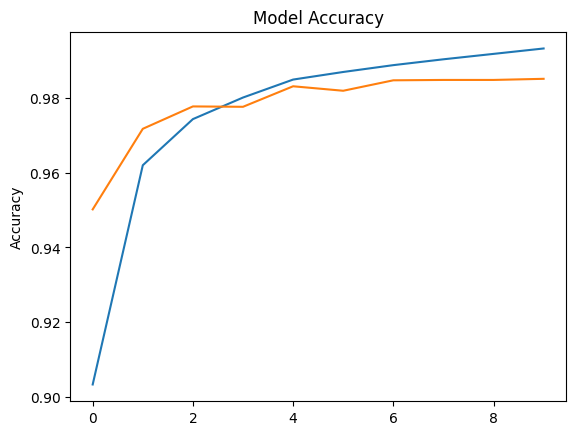

In [10]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

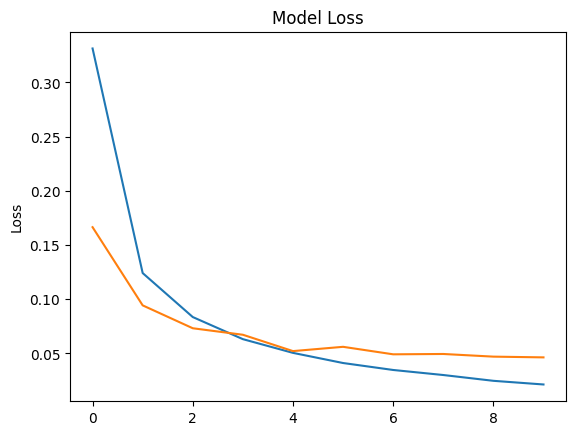

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')